<a href="https://colab.research.google.com/github/AgunsBaba/Assignment/blob/master/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
#import modules
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, plot_confusion_matrix
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
#import data
df = pd.read_excel('/content/Dry_Bean_Dataset.xlsx')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [63]:
#check data shape and general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [64]:
#check for duplicates
df.duplicated().sum()

68

In [67]:
df.drop_duplicates(inplace=True) #drop duplicates
df.duplicated().sum() #check to see duplicates have been dropped

0

In [71]:
#check missing values
print(df.isna().sum().to_markdown())

|                 |   0 |
|:----------------|----:|
| Area            |   0 |
| Perimeter       |   0 |
| MajorAxisLength |   0 |
| MinorAxisLength |   0 |
| AspectRation    |   0 |
| Eccentricity    |   0 |
| ConvexArea      |   0 |
| EquivDiameter   |   0 |
| Extent          |   0 |
| Solidity        |   0 |
| roundness       |   0 |
| Compactness     |   0 |
| ShapeFactor1    |   0 |
| ShapeFactor2    |   0 |
| ShapeFactor3    |   0 |
| ShapeFactor4    |   0 |
| Class           |   0 |


There are no missing values

In [73]:
#check consistency of the labels in the target variable
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

Labels for target variables are consistent

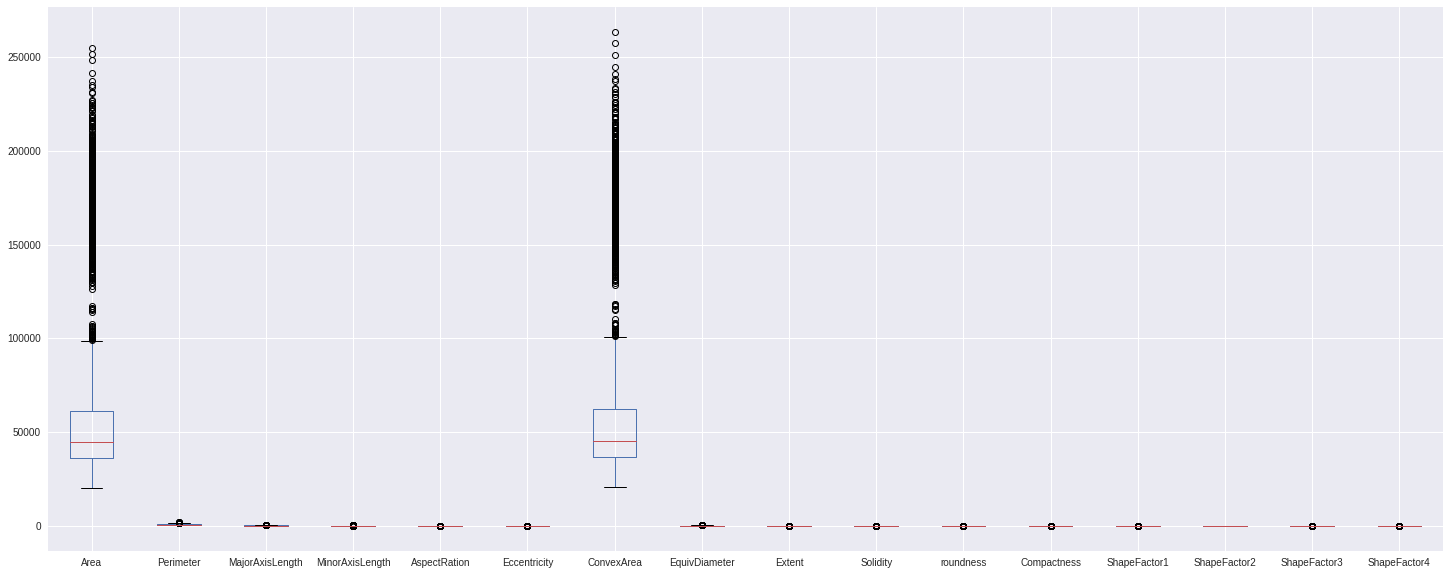

In [82]:
#check for outliers with boxplots
plt.style.use('seaborn')
df.boxplot(figsize=(25,10))
plt.show()

The Area and ConvexAarea variables are showing a lot of outliers. I'd first check the correlation between these two variables. 

In [87]:
corr = df['Area'].corr(df['ConvexArea'])
corr

0.9999396020129426

There's a strong correlation between the Area and ConvexArea variables. Since there's a strong correlation, I'll plot a bar chart of one of the variables (Area) and see if one of the target variables disproportionately have large values for Area. There's no need to plot bar chart for the two variables since they are highly correlated

Text(0.5, 1.0, 'Beans Area by Class')

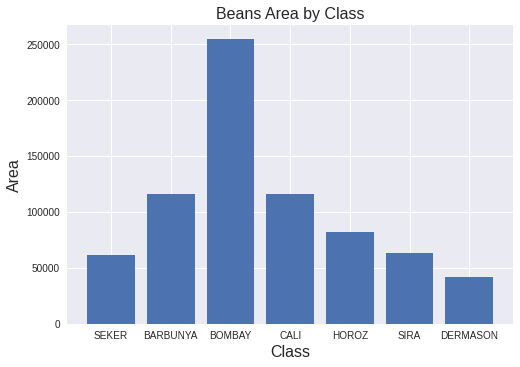

In [89]:
#plot bar chart
plt.bar(df['Class'], df['Area'])
plt.xlabel('Class', fontsize=16) #create x-axis labels
plt.ylabel('Area', fontsize=16) #create y-axis labels
plt.title('Beans Area by Class', fontsize=16) #create a title for the chart


From the plot above, the 'Bombay' class of Beans seems to have a disproportionately large Area, so the outliers observed is not abnormal